## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Importing necessary libraries

In [1]:
import pandas as pd
import os
import sqlite3
import matplotlib as plt
%matplotlib inline


# Checking that I am working in the correct directory 

In [6]:
pwd

'/Users/jarifathiel/Flatiron/Mod1_project/dsc-mod-1-project-v2-1-onl01-dtsc-ft-012120'

In [40]:
#df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [41]:
#df.head()

# Putting all the data sets together (Come up with something better)

In [2]:
from glob import glob

## Puts all data sets into a list (I believe)

In [3]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/imdb.title.crew.csv.gz',
 './zippedData/imdb.title.principals.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz']

In [7]:
type(csv_files)


list

## Using a for loop to iterate through the list of data sets (better markdown here)

In [8]:
d = {} #Why is d = to a dictionary but makes a list?

In [9]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [10]:
d.keys()

dict_keys(['./zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/imdb.title.crew.csv.gz', './zippedData/imdb.title.principals.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/tn.movie_budgets.csv.gz'])

## (Put something describing what is going on below)

In [11]:
d['./zippedData/imdb.title.crew.csv.gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


## Cleaning the data sets names to ger rid of the extra ".csv" & "." before "gz"

In [12]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [13]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [51]:
csv_files_dict.values()

dict_values([                                                 studio  domestic_gross  \
title                                                                     
Toy Story 3                                          BV     415000000.0   
Alice in Wonderland (2010)                           BV     334200000.0   
Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
Inception                                            WB     292600000.0   
Shrek Forever After                                P/DW     238700000.0   
...                                                 ...             ...   
The Quake                                         Magn.          6200.0   
Edward II (2018 re-release)                          FM          4800.0   
El Pacto                                           Sony          2500.0   
The Swan                                     Synergetic          2400.0   
An Actor Prepares                                 Grav.          1700.0   

           

In [14]:
csv_files_dict['bom_movie_gross_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


# Making SQL tables from csv (review)

## Making a new 

In [15]:
conn = sqlite3.connect("movies_db.sqlite")

## Making SQL tables from dataframes

In [16]:
def create_sql_table_from_df(df, name, conn):
    try:  #explain what this does
        df.to_sql(name, conn)  #pandas function turning dataframes into sql tables
        print(f"Created table {name}")
    
    except Exception as e:  #explain what this does
        print(f"could not make table {name}")
        print(e)

In [17]:
for name, table in csv_files_dict.items(): #Dont rerun do this
    create_sql_table_from_df(table, name, conn)

could not make table bom_movie_gross_gz
Table 'bom_movie_gross_gz' already exists.
could not make table imdb_name_basics_gz
Table 'imdb_name_basics_gz' already exists.
could not make table imdb_title_akas_gz
Table 'imdb_title_akas_gz' already exists.
could not make table imdb_title_basics_gz
Table 'imdb_title_basics_gz' already exists.
could not make table imdb_title_crew_gz
Table 'imdb_title_crew_gz' already exists.
could not make table imdb_title_principals_gz
Table 'imdb_title_principals_gz' already exists.
could not make table imdb_title_ratings_gz
Table 'imdb_title_ratings_gz' already exists.
could not make table tmdb_movies_gz
Table 'tmdb_movies_gz' already exists.
could not make table tn_movie_budgets_gz
Table 'tn_movie_budgets_gz' already exists.


In [18]:
conn.execute("select name from sqlite_master where type='table';").fetchall() #names of all of the tables

[('bom_movie_gross_gz',),
 ('imdb_name_basics_gz',),
 ('imdb_title_akas_gz',),
 ('imdb_title_basics_gz',),
 ('imdb_title_crew_gz',),
 ('imdb_title_principals_gz',),
 ('imdb_title_ratings_gz',),
 ('tmdb_movies_gz',),
 ('tn_movie_budgets_gz',)]

## Explain

In [57]:
for item in csv_files_dict.items():
        print("===============New DF===============")
        print(item[0])
        print(item[1].info())
        print("================End DF===============")

===============New DF===============
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB
None
================End DF===============
===============New DF===============
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None
================End DF===============
===============New DF===============
imdb_title_akas_gz
<class '

In [19]:
cur = conn.cursor()

In [104]:
csv_files_dict['imdb_name_basics_gz']

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


## Question 1: What are the 25 lowest grossing genre 

In [59]:
# print([description[0] for description in cur.description])
cur.execute("""SELECT * FROM bom_movie_gross_gz;""").fetchone() #why do I get an error when I put fetchall()?
gross_movie_df = pd.DataFrame(cur.fetchall())
gross_movie_df.columns = [i[0] for i in cur.description]
gross_movie_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
1,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
2,Inception,WB,292600000.0,535700000,2010
3,Shrek Forever After,P/DW,238700000.0,513900000,2010
4,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010


In [60]:
#all of the columns from the sql tables
cur.execute("""SELECT * FROM imdb_title_basics_gz 
                        JOIN tmdb_movies_gz 
                        USING(original_title) 
                        JOIN bom_movie_gross_gz 
                        USING(title);""")
genre_and_revenue_df = pd.DataFrame(cur.fetchall())
genre_and_revenue_df.columns = [i[0] for i in cur.description]
genre_and_revenue_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,tt1323594,Despicable Me,Despicable Me,2010,95.0,"Animation,Comedy,Family",8,"[16, 10751, 35]",20352,en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


!!!!!!!!!!!!!!!!!!!!!!!


In [61]:
#selecting columns needed out of sql tables and making them a pandas df
cur.execute("""SELECT primary_title, genres, domestic_gross, foreign_gross 
                        FROM imdb_title_basics_gz 
                        JOIN tmdb_movies_gz 
                        USING(original_title) 
                        JOIN bom_movie_gross_gz 
                        USING(title);""")
genre_and_revenue_df = pd.DataFrame(cur.fetchall())
genre_and_revenue_df.columns = [i[0] for i in cur.description]
genre_and_revenue_df.head()

,primary_title,genres,domestic_gross,foreign_gross
0,How to Train Your Dragon,"Action,Adventure,Animation",217600000.0,277300000
1,Iron Man 2,"Action,Adventure,Sci-Fi",312400000.0,311500000
2,Inception,"Action,Adventure,Sci-Fi",292600000.0,535700000
3,Toy Story 3,"Adventure,Animation,Comedy",415000000.0,652000000
4,Despicable Me,"Animation,Comedy,Family",251500000.0,291600000


In [62]:
genre_and_revenue_df.isna().sum()

primary_title        0
genres              46
domestic_gross      30
foreign_gross     1133
dtype: int64

In [63]:
print('Percentage of NA values in Domestic Gross:', len(genre_and_revenue_df[genre_and_revenue_df.domestic_gross.isna()])/ len(genre_and_revenue_df))
print('Number of Unique in Domestic gross:', genre_and_revenue_df.domestic_gross.nunique())

Percentage of NA values in Domestic Gross: 0.009244992295839754
Number of Unique in Domestic gross: 1247


Mean for domestic gross: 37056279.8059098
Median for domestic gross: 6200000.0


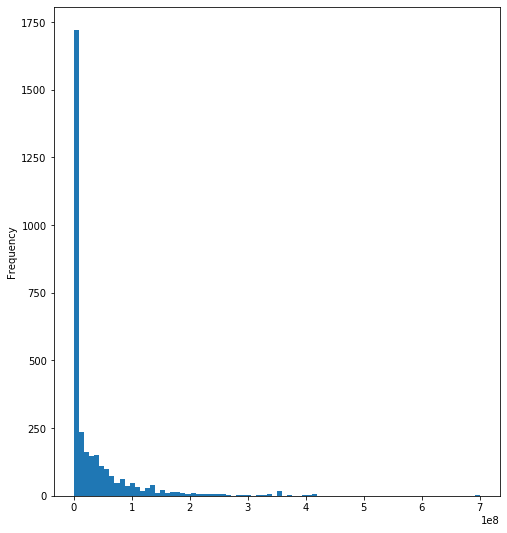

In [64]:
domestic_gross_mean = genre_and_revenue_df['domestic_gross'].mean() #finding domestic gross mean
domestic_gross_median = genre_and_revenue_df['domestic_gross'].median() #finding domestic gross median
genre_and_revenue_df['domestic_gross'].plot(kind='hist', bins=80, figsize=(8,9))

print('Mean for domestic gross: {}'.format(domestic_gross_mean))
print('Median for domestic gross: {}'.format(domestic_gross_median))

Cleaning domestic gross column putting the median in

In [65]:
genre_and_revenue_df['domestic_gross'] = genre_and_revenue_df['domestic_gross'].fillna(value=genre_and_revenue_df['domestic_gross'].median)

In [66]:
genre_and_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 4 columns):
primary_title     3245 non-null object
genres            3199 non-null object
domestic_gross    3245 non-null object
foreign_gross     2112 non-null object
dtypes: object(4)
memory usage: 101.5+ KB


In [67]:
genre_and_revenue_df.isna().sum()

primary_title        0
genres              46
domestic_gross       0
foreign_gross     1133
dtype: int64

cleaning the foreign gross column and filling missing values with the median

In [68]:
genre_and_revenue_df['foreign_gross'] = genre_and_revenue_df['foreign_gross'].fillna(value=genre_and_revenue_df['foreign_gross'].median)

In [69]:
genre_and_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 4 columns):
primary_title     3245 non-null object
genres            3199 non-null object
domestic_gross    3245 non-null object
foreign_gross     3245 non-null object
dtypes: object(4)
memory usage: 101.5+ KB


In [70]:
genre_and_revenue_df.isna().sum()

primary_title      0
genres            46
domestic_gross     0
foreign_gross      0
dtype: int64

In [71]:
genre_and_revenue_df.isna().any()

primary_title     False
genres             True
domestic_gross    False
foreign_gross     False
dtype: bool

In [72]:
genre_and_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 4 columns):
primary_title     3245 non-null object
genres            3199 non-null object
domestic_gross    3245 non-null object
foreign_gross     3245 non-null object
dtypes: object(4)
memory usage: 101.5+ KB


In [75]:
def convert_to_int(df, col): #converting from float and object to int
    df[col] = df[col].str.replace(".", "").astype('int')
    return df

In [76]:
#money_columns = ['domestic_gross', 'foreign_gross']

#for col in money_columns:
    #genre_and_revenue_df = convert_to_int(genre_and_revenue_df, col)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [77]:
#v1 = lambda x: float(x[1:-1]) #trying to convert domestic and forgien from
#object to int

In [87]:
#genre_and_revenue_df.domestic_gross = genre_and_revenue_df.apply(v1)

In [93]:
#dropping all of the rows that dont have genre, domestic gross or foreign gross
genre_and_revenue_df.dropna(subset=['genres', 'domestic_gross', 'foreign_gross'], inplace=True)

In [91]:
genre_and_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 0 to 3244
Data columns (total 4 columns):
primary_title     3199 non-null object
genres            3199 non-null object
domestic_gross    3199 non-null object
foreign_gross     3199 non-null object
dtypes: object(4)
memory usage: 125.0+ KB


In [94]:
genre_and_revenue_df['foreign_gross'] = genre_and_revenue_df.foreign_gross.astype('int')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'method'

In [ ]:
genre_and_revenue_df.domestic_gross.value_counts

In [ ]:
.head()


In [96]:
genre_and_revenue_df.groupby('domestic_gross').sum()


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [85]:
print(df)

In [97]:
print('=' * 100)

In [29]:
cur.execute("""SELECT genres, domestic_gross, worldwide_gross
                    FROM imdb_name_basics_gz
                    JOIN imdb_title_basics_gz 
                         ON primary_name = title
                    JOIN tn_movie_budgets_gz
                        ON movie = title;""").fetchall()

OperationalError: no such column: title

In [26]:
conn.execute("select name from sqlite_master where type='table';").fetchall() 

[('bom_movie_gross_gz',),
 ('imdb_name_basics_gz',),
 ('imdb_title_akas_gz',),
 ('imdb_title_basics_gz',),
 ('imdb_title_crew_gz',),
 ('imdb_title_principals_gz',),
 ('imdb_title_ratings_gz',),
 ('tmdb_movies_gz',),
 ('tn_movie_budgets_gz',)]

In [30]:
for item in csv_files_dict.items():
        print("===============New DF===============")
        print(item[0])
        print(item[1].info())
        print("================End DF===============")

===============New DF===============
bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB
None
================End DF===============
===============New DF===============
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None
================End DF===============
===============New DF===============
imdb_title_akas_gz
<class '